In [50]:
import pandas as pd
import seaborn as sns
import numpy as n

In [51]:
df = pd.read_csv('titanic.csv')

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df = df.drop('PassengerId', axis=1)

In [54]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [55]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [56]:
target = 'Survived'
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [58]:
df_copy = df.copy()

In [59]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Initial analysis

In [60]:
df_copy.corr(method='spearman')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


In [61]:
features_num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [62]:
df_copy.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Filling missing values in Age column with its mean

In [63]:
age_mean = np.mean(df_copy['Age'])

In [64]:
df_copy['Age'] = df_copy['Age'].fillna(age_mean)

In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [66]:
df_copy.to_csv('df_basic.csv', index=False)

## Data standarisation

In [67]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
df_copy[features_num]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


<AxesSubplot:xlabel='Age', ylabel='Count'>

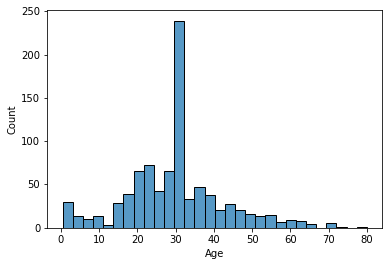

In [69]:
sns.histplot(data=df_copy, x='Age')

<AxesSubplot:xlabel='Age'>

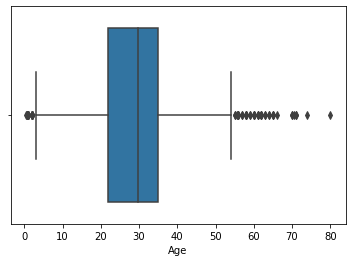

In [70]:
sns.boxplot(data=df_copy, x='Age')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

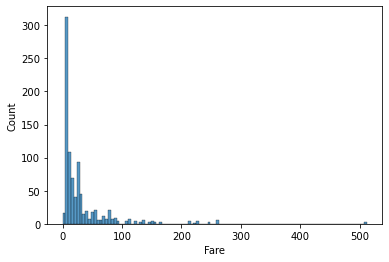

In [71]:
sns.histplot(data=df_copy, x='Fare')

<AxesSubplot:xlabel='Fare'>

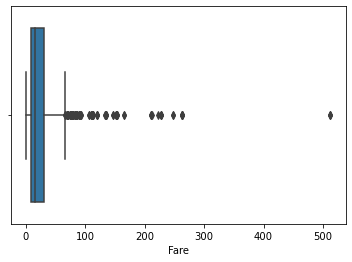

In [72]:
sns.boxplot(data=df_copy, x='Fare')

### removing outlires

In [73]:
def iqr_out(df):
    df_out = df.copy()
    
    for column in df_out.columns:
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3-Q1

        outliers = df_out[(df_out[column] < (Q1 - 1.5*IQR)) | (df_out[column] > (Q3 + 1.5*IQR))].index
        df_out.drop(outliers, axis=0, inplace=True)
    return df_out

In [74]:
df_test = iqr_out(df_copy[features_num + [target]])
df_test

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.000000,1,0,7.2500,0
2,3,26.000000,0,0,7.9250,1
3,1,35.000000,1,0,53.1000,1
4,3,35.000000,0,0,8.0500,0
5,3,29.699118,0,0,8.4583,0
...,...,...,...,...,...,...
884,3,25.000000,0,0,7.0500,0
886,2,27.000000,0,0,13.0000,0
887,1,19.000000,0,0,30.0000,1
889,1,26.000000,0,0,30.0000,1


In [75]:
def rm_out(df):
    df_out = df.copy()
    means, stdevs = {}, {}
    
    for column in df_out.columns:
        means[column] = df_out[column].mean()
        stdevs[column] = df_out[column].std()
        
    for column in df_out.columns:
        lower = means[column] - 3 * stdevs[column]
        upper = means[column] + 3 * stdevs[column]
        
        index = (lower < df_out[column]) & (df_out[column] < upper)
        df_out = df_out[index]
        
    df_out.index = range(len(df_out))
    return df_out

In [76]:
df_out = rm_out(df_copy[features_num + [target]])

In [77]:
df_out

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.000000,1,0,7.2500,0
1,1,38.000000,1,0,71.2833,1
2,3,26.000000,0,0,7.9250,1
3,1,35.000000,1,0,53.1000,1
4,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...
815,2,27.000000,0,0,13.0000,0
816,1,19.000000,0,0,30.0000,1
817,3,29.699118,1,2,23.4500,0
818,1,26.000000,0,0,30.0000,1


In [78]:
df_out.to_csv('df_out.csv', index=False)

## adding categorical columns

In [79]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [80]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### filling missing values in Embarked column

In [81]:
df_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [82]:
df_copy['Embarked'] = df_copy['Embarked'].fillna('S')

In [83]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [84]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Transforming Sex and Embarked columns

In [85]:
df_clean = pd.get_dummies(df_copy)

In [86]:
df_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [87]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [88]:
cat_columns = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [89]:
features_num

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### removing outlires

In [90]:
df_outrm = rm_out(df_clean[features_num])

In [91]:
df_out_clean = pd.concat([df_outrm, df_clean[cat_columns + [target]]],axis=1, join='inner')

In [92]:
df_out_clean.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,0


In [93]:
df_out_clean['SibSp'].unique()

array([1, 0, 3, 2], dtype=int64)

In [94]:
df_out_clean['Parch'].unique()

array([0, 1, 2], dtype=int64)

In [95]:
df_out_clean['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [96]:
df_out_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      820 non-null    int64  
 1   Age         820 non-null    float64
 2   SibSp       820 non-null    int64  
 3   Parch       820 non-null    int64  
 4   Fare        820 non-null    float64
 5   Sex_female  820 non-null    uint8  
 6   Sex_male    820 non-null    uint8  
 7   Embarked_C  820 non-null    uint8  
 8   Embarked_Q  820 non-null    uint8  
 9   Embarked_S  820 non-null    uint8  
 10  Survived    820 non-null    int64  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 42.6 KB


In [97]:
df_out_clean

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.000000,1,0,7.2500,0,1,0,0,1,0
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1
2,3,26.000000,0,0,7.9250,1,0,0,0,1,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
815,2,27.000000,0,0,13.0000,0,1,0,0,1,0
816,1,19.000000,0,0,30.0000,1,0,0,0,1,0
817,3,29.699118,1,2,23.4500,0,1,1,0,0,0
818,1,26.000000,0,0,30.0000,0,1,0,0,1,0


In [98]:
df_out_clean.to_csv('df_out_clean.csv')